In [ ]:
# milostipanov@gmail.com 
# https://github.com/meteorids
# 2022

#This Code is to process the output from the NeuralNetwork-Predict. Creating plots and statistics. Will combine the output file from the NN and the NILU-data-process for time stamps.

In [1]:
#This block will create a plot of a daily data from NN-output and NILU-data-process output.

import pandas as pd


# Seting up data:

processed_data = pd.read_csv('../MachineLearning-NILU/nnoutput-20140602.txt',  sep=r'\s+', header=None)
timestamp     = pd.read_csv('./NILU-OUT/processed_nilu-20140602.txt',  sep=r'\s+', header=None)

#year = str(timestamp[1])
date = timestamp[3]
time = timestamp[5]
doy  = timestamp[4]
sza  = timestamp[0]
scaled_ozone   = processed_data[0]
vol_frac       = processed_data[1]*10**-7



# Converting scaled ozone to Dobson Units
# Scaled to standard US atmosphere, the equivalent depth of ozone is 3.45×10^−3 m, in Dobson units= 345 DU. 1 eqd = 10^5 DU
ozone_DU = scaled_ozone*345
# Converting cloud particle vol. frac. to COD. Based on simulations. see code: COD_vs_volfrac.ipynb
cod = vol_frac*152596238.214


df = pd.DataFrame({'DATE': date,
                   'TIMEUTC': time,
                    'DOY': doy,
                   'SZA': sza,
                   'O3': ozone_DU,
                   'COD': cod})


# Filtering 1 day worth of data from the whole input

#sza
#processed_data[0]

df.to_csv("./STATS-PLOTS-OUT/dataframe.csv")

print(df)

#print(df['O3'].mean)

         DATE  TIMEUTC  DOY     SZA          O3       COD
0    20140602     1126  153  69.837  280.170327  0.130280
1    20140602     1127  153  69.652  280.904083  0.127012
2    20140602     1128  153  69.467  281.766591  0.126389
3    20140602     1129  153  69.283  281.918249  0.118468
4    20140602     1130  153  69.098  282.606974  0.116092
..        ...      ...  ...     ...         ...       ...
653  20140602     2219  153  69.199  283.083257  0.120737
654  20140602     2220  153  69.384  282.527182  0.126554
655  20140602     2221  153  69.568  281.595233  0.129455
656  20140602     2222  153  69.753  281.095798  0.137320
657  20140602     2223  153  69.937  280.421461  0.144667

[658 rows x 6 columns]


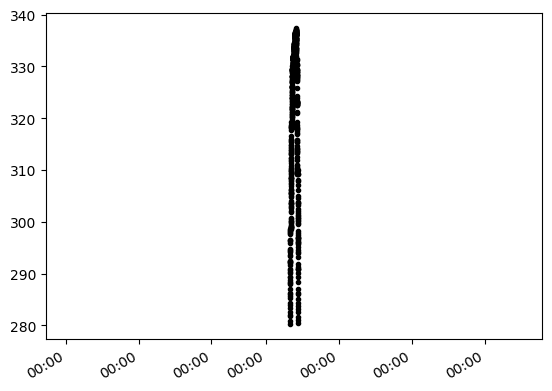

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime
import matplotlib.dates as mdates
import pytz
from dateutil import tz

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Let's plot 1 day
# Enter a day number:
choosen_day = 153

x=[ ]
y=[ ]

for i in range(len(df.DOY)):
    if df.DOY[i] == choosen_day:
        date2 = str(df.DATE[i])
        year = date2[0:4]
        month = date2[4:6]
        day = date2[6:8]
        time2 = str(df.TIMEUTC[i])
        hour = time2[0:2]
        minute = time2[2:]
        my_datetime = datetime.datetime(int(year),int(month),int(day),int(hour),int(minute),0,0, tzinfo = pytz.utc)
        my_datetime_utc = my_datetime.strftime('%Y-%m-%d %H:%M:%S %Z%z')
#        my_datetime_est = my_datetime.astimezone(pytz.timezone('US/Eastern')).strftime('%Y-%m-%d %H:%M:%S %Z%z')
        my_datetime_est = my_datetime.astimezone(pytz.timezone('US/Eastern'))
#        print(my_datetime_est)
        x.append(my_datetime_est)
        y.append(df.O3[i])
       
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M',tz=tz.gettz('US/Eastern')))
fig.autofmt_xdate()

#ax.plot(y, marker='.')
#ax.set_xticks([i for i in range(len(y))])
#ax.set_xticklabels(x)
#ax.locator_params(nbins=10)


plt.scatter(x, y, marker='.', color='black')
plt.show()


         DATE  TIMEUTC  DOY     SZA         O3       COD
328  20140602     1654  153  18.503  333.78019  0.183731


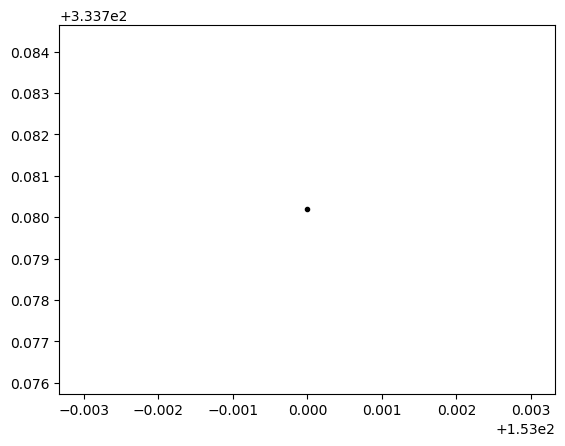

In [4]:

import matplotlib.pyplot as plt


high_noons = df.loc[df.groupby('DOY').SZA.idxmin()]
print(high_noons)

plt.scatter(high_noons['DOY'], high_noons['O3'], marker='.', color='black')
plt.show()

In [ ]:
# THIS IS UNUSED OLD VERSION

import matplotlib.pyplot as plt
import numpy as np
import math

# Let's plot 1 day
# Enter a day number:
day = 153

x=[ ]
y=[ ]

for i in range(len(df.DOY)):
    if df.DOY[i] == day:
        x.append(df.SZA[i])
        y.append(df.O3[i])
      
    
# Creating a symmetrix x axis with  SZA x (-1) if the angle is before solar noon     
x_axis=[]        
        
for i in range(len(x)-1):
    if x[i+1] > x[i]:
        x_axis.append(-x[i])
    else:
        x_axis.append(x[i])
        
# Adding the last list element        
x_axis.append(x[-1])
        
#print(x_axis)
#print(x)



# /math.cos(df.SZA[i]) 
#x_ticks = [*range(-70,-39,1)] + [*range(38,71,1)]
#plt.xticks(ticks=x_ticks)



fig, ax = plt.subplots()

#ax.set_xlim(-70, -39) #+ ax.set_xlim(38, 70)

#ax.plot(y, marker='.')
#ax.set_xticks([i for i in range(len(y))])
#ax.set_xticklabels(x)
#ax.locator_params(nbins=10)


plt.scatter(x_axis, y, marker='.', color='black')
plt.show()

#print(y)

In [ ]:
# Convert day number to date in particular year
from datetime import datetime
  
# initializing day number
day_num = "153"
  
# print day number
print("The day number : " + str(day_num))
  
# adjusting day num
#day_num.rjust(3 + len(day_num), '0')
  
# Initialize year
year = "2014"
  
# converting to date
res = datetime.strptime(year + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")
  
# printing result
print("Resolved date : " + str(res))

In [1]:
# Check how clear the day is by plotting raw ch5 vs time

day = 153

# Clean days found so far:
# 2014: 110, 153

ch5  = timestamp[1]
ch5df = pd.DataFrame({'CH5': ch5})


CH5=[ ]
for i in range(len(df.DOY)):
    if df.DOY[i] == day:
        CH5.append(ch5df.CH5[i])
        
        
T = range(len(CH5))      


    
plt.tight_layout()
plt.plot(T, CH5, color='gray')
plt.show()

NameError: name 'timestamp' is not defined